## Linear Transgression with the diamond data

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import certifi
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Tasks

### 1. The data file for this project is available from the Seaborn website. To load this data into a DataFrame, run this code:

In [54]:
data = sns.load_dataset('diamonds')
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### 2. Display the first five rows of data.

In [29]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### 3. Use a condensed heatmap to identify correlations for the price column. Sort the results, include annotations that format the values with three decimal places, and remove the color bar

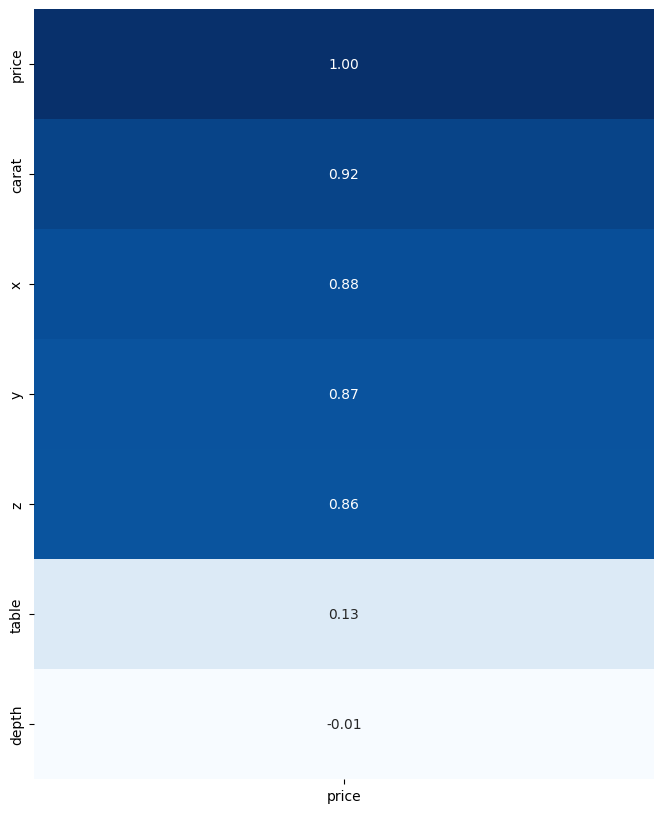

In [30]:
#gets numbers for heatmap
numeric_data = data.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_data.corr()

price_corr_sorted = corr_matrix[['price']].sort_values(by='price', ascending=False)

# Creates the heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(data=price_corr_sorted, annot=True, cmap='Blues', cbar=False, fmt='.2f')
plt.show()

### 4. Use the column with the strongest correlation to split the data into test and training datasets, where the test dataset consists of 30% of the total dataset. Be sure to specify a value for the random_state parameter

In [42]:
numeric_diamond_data = data.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_diamond_data.corr()
strongest_corr_column = corr_matrix['price'].drop('price').abs().idxmax()

print(f"The strongest correlated column with 'price' is: {strongest_corr_column}")


X = data[['carat']]  
y = data['price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)

x_test

The strongest correlated column with 'price' is: carat


,carat
20244,1.52
45013,0.54
53351,0.70
47212,0.59
1460,0.86
...,...
35801,0.31
14736,1.01
20694,1.53
40607,0.23


In [43]:
y_test

20244    8674
45013    1637
53351    2657
47212    1838
1460     2980
         ... 
35801     914
14736    5932
20694    8971
40607     498
17437    6989
Name: price, Length: 16182, dtype: int64

### 5. Create a LinearRegression object, and then fit the training dataset to the model.

In [44]:
model = LinearRegression()

model.fit(x_train, y_train)


LinearRegression()

### 6. Score the model using the test dataset.

In [45]:
score = model.score(x_test, y_test)

print(f"R^2 score of the model on the test dataset: {score:.4f}")

R^2 score of the model on the test dataset: 0.8504


### 7. Predict the y values based on the x values in the test dataset, and store the results in a variable.

In [47]:
X = data[['carat']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)

# Create and train the LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [48]:
y_pred


array([9540.64191438, 1940.07543252, 3180.98424589, ..., 9618.19871522,
       -464.18539337, 5507.68827094])

### 8. Put the predicted values in a DataFrame.

In [49]:
predicted_prices_df = pd.DataFrame(y_pred, columns=['Predicted_Price'])

print(predicted_prices_df.head())

   Predicted_Price
0      9540.641914
1      1940.075433
2      3180.984246
3      2327.859437
4      4421.893059


### 9. Join the y_test and predicted data with the x_test data, save the joined data in a new DataFrame, and then display the first five rows of data.

In [56]:
# Convert the predicted prices into a DataFrame
y_pred_data = pd.DataFrame(y_pred, index=X_test.index, columns=['Predicted_Price'])

y_test_data = pd.DataFrame(y_test)

joined_data = X_test.join(y_test_df).join(y_pred_df)

print(joined_df.head())

       carat  price  Predicted_Price
20244   1.52   8674      9540.641914
45013   0.54   1637      1940.075433
53351   0.70   2657      3180.984246
47212   0.59   1838      2327.859437
1460    0.86   2980      4421.893059


### 10. Melt the actual and predicted price columns together, assigning appropriate values to the variable and value names.

In [57]:
melted_df = pd.melt(joined_data, id_vars=['carat'], value_vars=['price', 'Predicted_Price'], 
                    var_name='Price_Type', value_name='Price')


print(melted_df.head(10))

   carat Price_Type   Price
0   1.52      price  8674.0
1   0.54      price  1637.0
2   0.70      price  2657.0
3   0.59      price  1838.0
4   0.86      price  2980.0
5   1.34      price  5778.0
6   1.20      price  7079.0
7   1.33      price  6118.0
8   0.31      price   625.0
9   0.73      price  3047.0


### 11. Use a Seaborn line plot without a confidence interval to plot the predicted data.

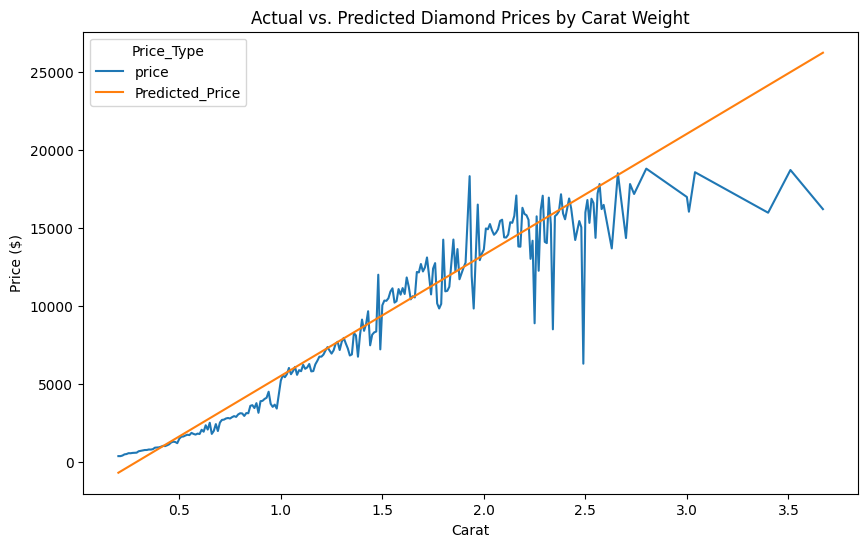

In [58]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=melted_df, x='carat', y='Price', hue='Price_Type', errorbar=None)

plt.title('Actual vs. Predicted Diamond Prices by Carat Weight')
plt.xlabel('Carat')
plt.ylabel('Price ($)')

plt.show()